# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [381]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# Import your own code
import inauguralproject

from scipy import optimize

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

In [382]:

from inauguralproject import ExchangeEconomyClass

**Explain how you solve the model**

In [383]:
# code for solving the model (remember documentation and comments)
#import module
economy = ExchangeEconomyClass()

#set parameters as in the py-file
par = economy.par

#determine utility of initial endowment
# a. consumer A
utility_init_A = economy.utility_A(economy.par.w1A, economy.par.w2A) #calling utility function in py-file
print(f"The utility of the bundle (x1A = {par.w1A}, x2A = {par.w2A}) is: {utility_init_A:.3f}")

# b. consumer B
utility_init_B = economy.utility_B(economy.par.w1B,economy.par.w2B) #calling utility function in py-file
print(f"The utility of the bundle (x1B = {par.w1B:.1f}, x2B = {par.w2B}) is: {utility_init_B:.3f}")

#create grid for x1a and x2a
N = 75
x1A_val = np.linspace(0,1,N)
x2A_val = np.linspace(0,1,N)

#create a set C
C = []

#loop through grid and append pareto optimal values to C
for x1A in x1A_val:
    for x2A in x2A_val:
        # a. calculate the corresponding consume for B that follows from walras' law:
        x1B = 1-x1A
        x2B = 1-x2A
        # b. calculate utility at every point
        utility_A=economy.utility_A(x1A,x2A)
        utility_B=economy.utility_B(x1B,x2B)
        # c. check if value is pareto
        if utility_A >= utility_init_A and utility_B >= utility_init_B:
            # d. append to C if condition is satisfied
            C.append((x1A,x2A))

The utility of the bundle (x1A = 0.8, x2A = 0.3) is: 0.416
The utility of the bundle (x1B = 0.2, x2B = 0.7) is: 0.304


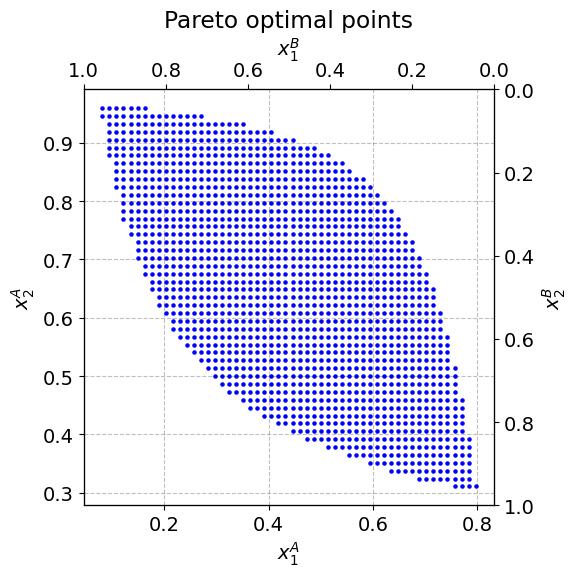

In [384]:
#plot edgeworth box
C = np.array(C)
fig, ax1 = plt.subplots(figsize=(6, 6), dpi=100)

# a. plot the points for agent A
ax1.scatter(C[:, 0], C[:, 1], s=5, color='blue') 
ax1.set_xlabel('$x^A_1$')
ax1.set_ylabel('$x^A_2$')
# b. create axes for agent B
ax2 = ax1.twinx() 
ax3 = ax1.twiny()  
ax2.set_ylabel('$x^B_2$')
ax3.set_xlabel('$x^B_1$')
ax3.invert_xaxis()
ax2.invert_yaxis()
# c. create title
plt.title('Pareto optimal points')
# d. enable grid for primary axes 
ax1.grid(True)
# e. disable grid for secondary axes
ax2.grid(False)
ax3.grid(False)
plt.tight_layout()
plt.show()

#få grid til at være aligned og pænt
#evt. tilføje indifferenskurver... hvordan?
#måske også få denne ind i py-filen

# Question 2

Explain your code and procedure

In [385]:

# Define the price set with an increment of 1/2N
P1 = np.arange(0.5, 2.5+ (1/(N)*2), 1/(N)*2)
print(P1)

#loop over prices in price set
for p1 in P1:
    # a. call the market clearing in the py-file
    epsilon_1, epsilon_2 = economy.check_market_clearing(p1)

print(f'epsilon 1 = {epsilon_1:.3f}, epsilon 2 = {epsilon_2: .3f}')    

[0.5        0.52666667 0.55333333 0.58       0.60666667 0.63333333
 0.66       0.68666667 0.71333333 0.74       0.76666667 0.79333333
 0.82       0.84666667 0.87333333 0.9        0.92666667 0.95333333
 0.98       1.00666667 1.03333333 1.06       1.08666667 1.11333333
 1.14       1.16666667 1.19333333 1.22       1.24666667 1.27333333
 1.3        1.32666667 1.35333333 1.38       1.40666667 1.43333333
 1.46       1.48666667 1.51333333 1.54       1.56666667 1.59333333
 1.62       1.64666667 1.67333333 1.7        1.72666667 1.75333333
 1.78       1.80666667 1.83333333 1.86       1.88666667 1.91333333
 1.94       1.96666667 1.99333333 2.02       2.04666667 2.07333333
 2.1        2.12666667 2.15333333 2.18       2.20666667 2.23333333
 2.26       2.28666667 2.31333333 2.34       2.36666667 2.39333333
 2.42       2.44666667 2.47333333 2.5       ]
epsilon 1 = -0.373, epsilon 2 =  0.933


# Question 3

Explain your code and procedure

In [386]:
init_guess = 2.5
instance = economy.walras(init_guess, eps=1e-8, maxiter=500)

print(f'At the price p1 = {instance:.3f}, the market for both goods clear, under the conditon that p2 is numeraire')

  0: p1 =   2.12666667 -> excess demand ->    -0.37333333
  1: p1 =   1.79312435 -> excess demand ->    -0.33354232
  2: p1 =   1.50914630 -> excess demand ->    -0.28397804
  3: p1 =   1.28463453 -> excess demand ->    -0.22451178
  4: p1 =   1.12574572 -> excess demand ->    -0.15888881
   ...
 22: p1 =   0.94444445 -> excess demand ->    -0.00000001
At the price p1 = 0.944, the market for both goods clear, under the conditon that p2 is numeraire


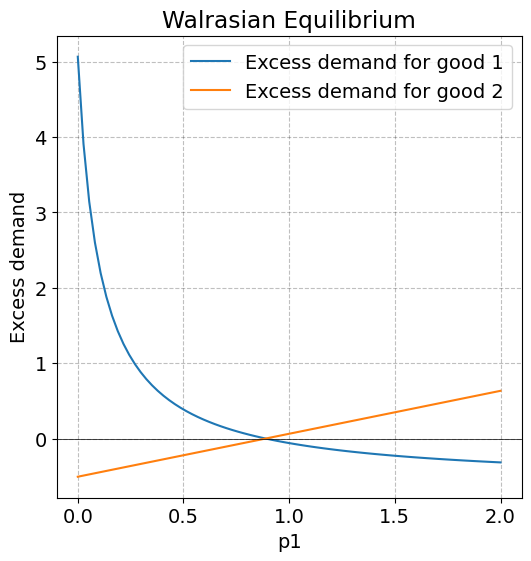

In [387]:
import numpy as np
import matplotlib.pyplot as plt

excess_demands = []
price_range = np.linspace(0.1,2,N)
# Use your instance to calculate excess demand for each price
for p1 in price_range:
    excess_demand = economy.check_market_clearing(p1)
    excess_demands.append(excess_demand)

# Convert the list of tuples into a NumPy array for easy plotting
excess_demands = np.array(excess_demands)

# Plotting
plt.figure(figsize=(6, 6))

# Plot excess demand for good 1
plt.plot(np.linspace(0,2,N), excess_demands[:, 0], label='Excess demand for good 1')

# Plot excess demand for good 2
plt.plot(np.linspace(0,2,N), excess_demands[:, 1],label='Excess demand for good 2')

# Add a horizontal line at zero to indicate market clearing
plt.axhline(0, color='black', linewidth=0.5)

plt.title('Walrasian Equilibrium')
plt.xlabel('p1')
plt.ylabel('Excess demand')
plt.legend()
plt.grid(True)
plt.show()

# Questions 5a and 5b

In [388]:
#5a. 
max_utility_A = -np.inf 
best_allocation_A = None

# Loop through all points in the set C
for allocation in C:
    # a. set current utility for A as utility of endowment 
    current_utility_A = economy.utility_A(par.w1A, par.w2A)
    if current_utility_A > max_utility_A:
        max_utility_A = current_utility_A
        best_allocation_A = allocation

print(best_allocation_A)

#find allocation if choice set is unrestricted, but B must not be worse off than with initial endowment
obj = lambda x: -economy.utility_A(x[0], x[1])

constraint = lambda x: economy.utility_B(1 - x[0], 1 - x[1]) - economy.utility_B(1 - par.w1A, 1 - par.w2A)
constraints = {'type': 'ineq', 'fun': constraint}
bounds = ((1e-8, 1), (1e-8, 1))

x0 = [par.w1A, par.w2A]
result = optimize.minimize(obj, x0, method='SLSQP', bounds=bounds, constraints=constraints)

x1 = result.x[0]
x2 = result.x[1]
u = economy.utility_A(x1,x2)

print(x1,x2,u)

#tjek løsning og få indført i py-filen i stedet

[0.08108108 0.94594595]
0.5757450571871308 0.8444377880991675 0.7432276287140577


In [389]:
#forsøg i py-fil
consumer = ExchangeEconomyClass()
consumer.solve()
print(f'x1 = {result.x[0]:.3f}, x2 = {result.x[1]:.3f}, u = {economy.utility_A(result.x[0],result.x[1]):3f}')


x1 = 0.576, x2 = 0.844, u = 0.743228


In [399]:
opt = ExchangeEconomyClass()
opt.solve2()
print(f'the optimal value of x1 = {opt.sol.x1:.3f}, and x2 = {opt.sol.x2:.3f}, at which the utility is u = {opt.sol.u:.3f}')

the optimal value of x1 = 0.333, and x2 = 0.667, at which the utility is u = 0.529


ADD CONCISE CONLUSION.